In [1]:
import numpy as np
import pandas as pd
import embedding_helper

/Users/aceto/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package punkt to /Users/aceto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
VAL_DATA = "../data/validation/validation_data_top_10_percent_0.9.csv"
GAMES_DATA = "../data/clean_data.csv"

In [3]:
val_data = pd.read_csv(VAL_DATA, sep=";", index_col=0)
#lower index
val_data.index = val_data.index.str.lower()
#lower columns
val_data.columns = val_data.columns.str.lower()
val_data

,a total war saga: troy,among us,baldur's gate: enhanced edition,baldur's gate ii: enhanced edition,baldur's gate 3,batman: arkham city,batman: arkham knight,batman: arkham origins,block n load,block story,...,total war: napoleon definitive edition,total war: pharaoh,total war: rome remastered,total war: rome ii - emperor edition,total war: three kingdoms,total war: warhammer,total war: warhammer ii,total war: warhammer iii,uncharted: legacy of thieves collection,unturned
a total war saga: troy,0.9,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.0,0.0,NaN
among us,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate: enhanced edition,0.5,0.0,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate ii: enhanced edition,0.5,0.0,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate 3,0.5,0.0,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total war: warhammer,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.0,0.0,NaN
total war: warhammer ii,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.0,0.0,NaN
total war: warhammer iii,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.0,0.0,NaN
uncharted: legacy of thieves collection,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,NaN


In [4]:
for i in val_data.columns:
    if i not in val_data.index:
        val_data = val_data.drop(i, axis=1)
        print(i)

unnamed: 36


In [5]:
np.fill_diagonal(val_data.values, 1)
val_data

,a total war saga: troy,among us,baldur's gate: enhanced edition,baldur's gate ii: enhanced edition,baldur's gate 3,batman: arkham city,batman: arkham knight,batman: arkham origins,block n load,block story,...,total war: napoleon definitive edition,total war: pharaoh,total war: rome remastered,total war: rome ii - emperor edition,total war: three kingdoms,total war: warhammer,total war: warhammer ii,total war: warhammer iii,uncharted: legacy of thieves collection,unturned
a total war saga: troy,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.0,0.0,NaN
among us,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate: enhanced edition,0.5,0.0,1.0,0.9,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate ii: enhanced edition,0.5,0.0,0.9,1.0,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate 3,0.5,0.0,0.9,0.9,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total war: warhammer,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.0,0.0,NaN
total war: warhammer ii,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.0,0.0,NaN
total war: warhammer iii,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.0,NaN
uncharted: legacy of thieves collection,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,1.0,NaN


In [6]:
games_clean = pd.read_csv(GAMES_DATA, sep=";",)
#lower all Name
games_clean['Name'] = games_clean['Name'].str.lower()
#games_clean = games_clean.set_index('Name')
games_clean

,Name,Release date,Estimated owners,About the game,Positive,Negative,Developers,Publishers,Categories,Genres,Tags,Popularity
0,counter-strike: global offensive,21.08.2012,100000000,Counter-Strike: Global Offensive (CS: GO) expa...,5764420,766677,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",0.785569
1,dota 2,09.07.2013,200000000,"The most-played game on Steam. Every day, mill...",1477153,300437,Valve,Valve,"Multi-player,Co-op,Steam Trading Cards,Steam W...","Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",0.566434
2,pubg: battlegrounds,21.12.2017,100000000,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",1154655,895978,"KRAFTON, Inc.","KRAFTON, Inc.","Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...",0.434255
3,team fortress 2,10.10.2007,100000000,The most fun you can have online - PC Gamer Is...,823693,56683,Valve,Valve,"Multi-player,Cross-Platform Multiplayer,Steam ...","Action,Free to Play","Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",0.275344
4,black myth: wukong,19.08.2024,100000000,Black Myth: Wukong is an action RPG rooted in ...,663109,28700,Game Science,Game Science,"Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG","Mythology,Action RPG,Action,RPG,Souls-like,Com...",0.257988
...,...,...,...,...,...,...,...,...,...,...,...,...
9574,deserving life,13.10.2017,100000,Deserving Life is a room-scale virtual reality...,96,20,"Lukas Paul, Gabriel Mittermair",Deserving Life,"Single-player,Steam Achievements",Free to Play,"Free to Play,Horror,VR",0.000211
9575,timen runner,26.05.2017,100000,Hardcore pixel 2D platformer with steampunk el...,49,44,REX PEX GAMES,REX PEX GAMES,"Single-player,Steam Achievements,Steam Trading...","Casual,Indie","Indie,Casual,Platformer,2D,Pixel Graphics,Grea...",0.000211
9576,mahjong deluxe 2: astral planes,20.07.2016,100000,Mahjong Deluxe 2: Astral Planes is an out-of-t...,47,45,EnsenaSoft,EnsenaSoft,Unknown,Casual,"Casual,Puzzle",0.000211
9577,pizza frenzy deluxe,30.08.2006,100000,Pizza Frenzy is a wacky action puzzler that pu...,125,5,"PopCap Games, Inc.","PopCap Games, Inc.",Single-player,Casual,Casual,0.000211


## Check lengths of attributes

In [7]:
genres = games_clean['Genres'].str.split(',').sum()
genres = set(genres)
len(genres)

26

In [8]:
tags = games_clean['Tags'].str.split(',').sum()
tags = set(tags)
len(tags)

437

In [10]:
games_clean['sentences'] = games_clean['About the game'].apply(lambda x: embedding_helper.string_to_sentences(x))
games_clean.sentences.describe()

count                           9579
unique                          9546
top       [No description available]
freq                              18
Name: sentences, dtype: object

In [11]:
#Count max length of sentences
max_len = 0
for i in games_clean.sentences:
    if len(i) > max_len:
        max_len = len(i)
        
max_len

142

## Only keep the games that are in the validation data

In [12]:
val_games = games_clean[games_clean['Name'].isin(val_data.index)]

In [13]:
#Check if all val_games can be matched in val_data
for i in val_games['Name']:
    if i not in val_data.index:
        val_games = val_games[val_games['Name'] != i]
        print(i)
 
#Missing values in unturned, so delete it
val_games = val_games[val_games['Name'] != 'unturned']
val_games

,Name,Release date,Estimated owners,About the game,Positive,Negative,Developers,Publishers,Categories,Genres,Tags,Popularity,sentences
7,terraria,16.05.2011,50000000,"Dig, Fight, Explore, Build: The very world is ...",964983,21044,Re-Logic,Re-Logic,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,Indie,RPG","Open World Survival Craft,Sandbox,Survival,2D,...",0.181122,"[Dig, Fight, Explore, Build: The very world is..."
10,among us,16.11.2018,50000000,Play with 4-15 player online or via local WiFi...,577656,51069,Innersloth,Innersloth,"Multi-player,PvP,Online PvP,LAN PvP,Co-op,Onli...",Casual,"Multiplayer,Online Co-Op,Social Deduction,Spac...",0.154622,[Play with 4-15 player online or via local WiF...
26,the witcher 3: wild hunt,18.05.2015,20000000,The Witcher: Wild Hunt is a story-driven open ...,617738,25020,CD PROJEKT RED,CD PROJEKT RED,"Single-player,Steam Achievements,Full controll...",RPG,"Open World,RPG,Story Rich,Atmospheric,Mature,F...",0.093750,[The Witcher: Wild Hunt is a story-driven open...
29,rocket league,06.07.2015,20000000,Rocket League is a high-powered hybrid of arca...,493188,62447,Psyonix LLC,Psyonix LLC,"Single-player,Multi-player,PvP,Online PvP,Shar...","Action,Indie,Racing,Sports","Multiplayer,Soccer,Competitive,Sports,Racing,T...",0.089604,[Rocket League is a high-powered hybrid of arc...
32,stardew valley,26.02.2016,20000000,Stardew Valley is an open-ended country-life R...,475785,8983,ConcernedApe,ConcernedApe,"Single-player,Multi-player,Co-op,Online Co-op,...","Indie,RPG,Simulation","Farming Sim,Life Sim,Pixel Graphics,RPG,Multip...",0.079778,[Stardew Valley is an open-ended country-life ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,a total war saga: troy,02.09.2021,100000,"In this legendary age, heroes walk the earth. ...",1419,551,"CREATIVE ASSEMBLY,Feral Interactive (Mac)","SEGA,Feral Interactive (Mac)","Single-player,Multi-player,PvP,Online PvP,LAN ...","Action,Simulation,Strategy","Strategy,Simulation,Action,Historical,RTS,War,...",0.000401,"[In this legendary age, heroes walk the earth...."
7110,block story,10.12.2015,100000,Build a world of vast landscapes where you hav...,878,232,"MindBlocks Studio, LLC","MindBlocks Studio, LLC","Single-player,Steam Achievements,Partial Contr...","Action,Adventure,Indie,RPG","RPG,Adventure,Open World Survival Craft,Sandbo...",0.000307,[Build a world of vast landscapes where you ha...
7643,batman: arkham city,15.11.2011,50000,No escape from Arkham Citythe sprawling mega-p...,1966,26,Rocksteady Studios,Warner Bros. Interactive Entertainment,"Single-player,Steam Achievements,Partial Contr...","Action,Adventure","Action,Adventure,Open World,Third Person",0.000263,[No escape from Arkham Citythe sprawling mega-...
7692,stranded,20.05.2014,100000,You wake from cryostasis to find your ship lyi...,160,302,Peter Moorhead,Curve Games,"Single-player,Steam Trading Cards","Adventure,Indie","Adventure,Indie,Point & Click,Walking Simulato...",0.000260,[You wake from cryostasis to find your ship ly...


In [14]:
from transformers import BertTokenizer, BertModel
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

val_games['sentences_desc'] = val_games['About the game'].apply(lambda x: embedding_helper.string_to_sentences(x))
val_games['bert_tokens_desc'] = val_games['About the game'].apply(lambda x: bert_tokenizer(x, return_tensors='pt', padding=True, truncation=True))
val_games['desc_tag'] = val_games['Name'] + '.' + val_games['Tags'] + '.' + games_clean['About the game']
val_games['sentences_desc_tag'] = val_games['desc_tag'].apply(lambda x: embedding_helper.string_to_sentences(x))
val_games['name_tokens'] = val_games['Name'].apply(lambda x: x.split(' '))
val_games['tags_token'] = val_games['Tags'].apply(lambda x: x.split(','))
val_games['genre_token'] = val_games['Genres'].apply(lambda x: x.split(','))

/Users/aceto/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
from sentence_transformers import SentenceTransformer
import gensim.downloader as api
import torch

model = SentenceTransformer('all-mpnet-base-v2')
w2v_model = api.load('word2vec-google-news-300')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(tokens):
    """Return numpy array of embeddings for the given tokens"""
    with torch.no_grad():
        output = bert_model(**tokens)
    return output.last_hidden_state.mean(dim=1)


val_games['embeddings_desc'] = val_games['sentences_desc'].apply(lambda x: model.encode(x).mean(axis=0))
val_games['embeddings_desc_wrong'] = val_games['About the game'].apply(lambda x: model.encode(x))
val_games['embeddings_desc_tokens'] = val_games['bert_tokens_desc'].apply(lambda x: get_bert_embeddings(x))
val_games['embeddings_desc_tag'] = val_games['sentences_desc_tag'].apply(lambda x: model.encode(x).mean(axis=0))
val_games['name_embd'] = val_games['name_tokens'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))
val_games['tags_embd'] = val_games['tags_token'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))
val_games['genre_embd'] = val_games['genre_token'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))

/Users/aceto/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/Users/aceto/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aceto/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Fill empty embeddings with zeros

In [16]:
val_games['embeddings_desc'] = val_games['embeddings_desc'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
val_games['embeddings_desc_wrong'] = val_games['embeddings_desc_wrong'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
val_games['embeddings_desc_tokens'] = val_games['embeddings_desc_tokens'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
val_games['embeddings_desc_tag'] = val_games['embeddings_desc_tag'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
val_games['name_embd'] = val_games['name_embd'].apply(lambda x: np.zeros(300) if isinstance(x, float) and pd.isna(x) else x)
val_games['tags_embd'] = val_games['tags_embd'].apply(lambda x: np.zeros(300) if isinstance(x, float) and pd.isna(x) else x)
val_games['genre_embd'] = val_games['genre_embd'].apply(lambda x: np.zeros(300) if isinstance(x, float) and pd.isna(x) else x)

## Calculate a similarity matrix between all test entries

In [17]:
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

def calc_sim_matrix(val_games: pd.DataFrame, embd_column: str, metric: str):
    similarity_matrix = pd.DataFrame(index=val_games['Name'], columns=val_games['Name'], dtype=np.float32)
    tracker = []
    # Calculate the similarity matrix
    if metric == 'cosine':
        for i in tqdm(val_games.index):
            if i in tracker:
                continue
            for j in val_games.index:
                embedding_i = val_games.loc[i, embd_column]
                embedding_j = val_games.loc[j, embd_column]
                similarity_matrix.loc[val_games.loc[i, 'Name'], val_games.loc[j, 'Name']] = cosine_similarity(
                    embedding_i.reshape(1, -1),
                    embedding_j.reshape(1, -1)
                )[0, 0]
            tracker.append(i)
    elif metric == 'soft-cosine':
        int_sim_matrix = np.eye(val_games.iloc[0][embd_column].shape[0])
        for i in tqdm(val_games.index):
            if i in tracker:
                continue
            for j in val_games.index:
                embedding_i = val_games.loc[i, embd_column]
                embedding_j = val_games.loc[j, embd_column]
                dot_product = np.dot(embedding_i, np.dot(int_sim_matrix, embedding_j))
                norm1 = np.sqrt(np.dot(embedding_i, np.dot(int_sim_matrix, embedding_i)))
                norm2 = np.sqrt(np.dot(embedding_j, np.dot(int_sim_matrix, embedding_j)))
                # Prevent division by zero
                similarity = 1 - (dot_product / (norm1 * norm2)) if norm1 != 0 and norm2 != 0 else 0
                similarity_matrix.loc[val_games.loc[i, 'Name'], val_games.loc[j, 'Name']] = similarity
            tracker.append(i)
    elif metric == 'euclidean':
        for i in tqdm(val_games.index):
            if i in tracker:
                continue
            for j in val_games.index:
                embedding_i = val_games.loc[i, embd_column]
                embedding_j = val_games.loc[j, embd_column]
                distance = np.linalg.norm(embedding_i - embedding_j)
                similarity_matrix.loc[val_games.loc[i, 'Name'], val_games.loc[j, 'Name']] = 1 / (1 + distance)
            tracker.append(i)
            
    elif metric == 'manhattan':
        for i in tqdm(val_games.index):
            if i in tracker:
                continue
            for j in val_games.index:
                embedding_i = val_games.loc[i, embd_column]
                embedding_j = val_games.loc[j, embd_column]
                distance = np.sum(np.abs(embedding_i - embedding_j))
                similarity_matrix.loc[val_games.loc[i, 'Name'], val_games.loc[j, 'Name']] = 1 / (1 + distance)
            tracker.append(i)
    return similarity_matrix
# Verify embeddings are correctly calculated
assert not val_games['embeddings_desc'].isnull().any(), "Some embeddings are null"

# Initialize the similarity matrix
similarity_matrix_desc = calc_sim_matrix(val_games, 'embeddings_desc', 'cosine')
similarity_matrix_desc

100%|██████████| 72/72 [00:00<00:00, 80.53it/s]


Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.418409,0.653379,0.197249,0.566272,0.681062,0.345921,0.583899,0.551367,0.404240,...,0.264326,0.509785,0.675898,0.501096,0.589751,0.425447,0.698929,0.205307,0.432545,0.531149
among us,0.418409,1.000000,0.455712,0.338565,0.436270,0.577216,0.359393,0.432041,0.426721,0.330514,...,0.237124,0.308412,0.491510,0.460075,0.391767,0.281282,0.480309,0.218853,0.390164,0.476928
the witcher 3: wild hunt,0.653379,0.455712,1.000000,0.184871,0.541590,0.650740,0.519386,0.529123,0.580148,0.366262,...,0.468413,0.519431,0.518789,0.595914,0.622343,0.532920,0.757605,0.289476,0.353006,0.599837
rocket league,0.197249,0.338565,0.184871,1.000000,0.144809,0.268660,0.330287,0.194953,0.202332,0.245379,...,0.042980,0.164824,0.284734,0.350589,0.205352,0.086427,0.250939,0.138376,0.137641,0.137065
stardew valley,0.566272,0.436270,0.541590,0.144809,1.000000,0.590218,0.314502,0.546625,0.435504,0.426490,...,0.234086,0.304671,0.687931,0.376777,0.409058,0.294862,0.646643,0.106598,0.277775,0.688703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.425447,0.281282,0.532920,0.086427,0.294862,0.426594,0.292887,0.451931,0.519537,0.201215,...,0.396960,0.373850,0.294400,0.404589,0.662024,1.000000,0.495398,0.233756,0.242750,0.267077
block story,0.698929,0.480309,0.757605,0.250939,0.646643,0.672377,0.408700,0.580478,0.601102,0.434799,...,0.302649,0.420131,0.685721,0.574944,0.591049,0.495398,1.000000,0.206486,0.357617,0.592680
batman: arkham city,0.205307,0.218853,0.289476,0.138376,0.106598,0.337995,0.430722,0.131220,0.288777,0.284415,...,0.376300,0.259325,0.132764,0.279090,0.187117,0.233756,0.206486,1.000000,0.202187,0.209272


In [18]:
val_data

,a total war saga: troy,among us,baldur's gate: enhanced edition,baldur's gate ii: enhanced edition,baldur's gate 3,batman: arkham city,batman: arkham knight,batman: arkham origins,block n load,block story,...,total war: napoleon definitive edition,total war: pharaoh,total war: rome remastered,total war: rome ii - emperor edition,total war: three kingdoms,total war: warhammer,total war: warhammer ii,total war: warhammer iii,uncharted: legacy of thieves collection,unturned
a total war saga: troy,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.0,0.0,NaN
among us,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate: enhanced edition,0.5,0.0,1.0,0.9,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate ii: enhanced edition,0.5,0.0,0.9,1.0,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
baldur's gate 3,0.5,0.0,0.9,0.9,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total war: warhammer,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.0,0.0,NaN
total war: warhammer ii,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.0,0.0,NaN
total war: warhammer iii,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.0,NaN
uncharted: legacy of thieves collection,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,1.0,NaN


### Create function to see the delta between the calculated similarity and the validation data

In [19]:
def delta_matrix(val_data, similarity_matrix):
    delta = pd.DataFrame(index=similarity_matrix.index, columns=similarity_matrix.columns, dtype=np.float32)
    tracker = []
    for i in similarity_matrix.index:
        if i in tracker:
            continue
        for j in similarity_matrix.columns:
            val_sim = val_data.loc[i, j]
            calc_sim = similarity_matrix.loc[i, j]
            delta.loc[i, j] = calc_sim - val_sim
        tracker.append(i)
    return delta

delta_matrix(val_data, similarity_matrix_desc)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.4417500138282776' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.307478928565979' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.20421876907348635' has dtype incompatible with float32, please explici

Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.192093e-07,0.418409,6.533794e-01,1.972488e-01,0.566272,0.681062,-0.154079,0.583899,0.551367,0.404240,...,0.264326,0.509785,-0.224102,0.001096,0.589751,4.254472e-01,-0.201071,0.205307,-0.467455,3.114879e-02
among us,4.184094e-01,0.000000,4.557124e-01,3.385649e-01,0.436270,0.577216,0.359393,0.432041,0.426721,0.330514,...,0.237124,0.308412,0.491510,0.460075,0.391767,2.812823e-01,0.480309,0.218853,0.390164,4.769279e-01
the witcher 3: wild hunt,-2.466206e-01,0.455712,1.192093e-07,1.848707e-01,0.541590,0.150740,0.519386,0.529123,0.580148,0.366262,...,0.468413,0.519431,0.518789,0.595914,0.622343,5.329200e-01,0.757605,-0.210524,0.353006,5.998375e-01
rocket league,1.972488e-01,0.338565,1.848707e-01,-1.788139e-07,0.144809,0.268660,0.330287,0.194953,0.202332,0.245379,...,0.042980,0.164824,0.284734,0.350589,0.205352,8.642743e-02,0.250939,0.138376,0.137641,1.370647e-01
stardew valley,5.662723e-01,0.436270,5.415903e-01,1.448087e-01,0.000000,0.590218,-0.185498,0.546625,0.435504,0.426490,...,0.234086,0.304671,0.687931,0.376777,0.409058,2.948624e-01,0.646643,0.106598,-0.222225,-2.112968e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,4.254472e-01,0.281282,5.329200e-01,-4.135726e-01,-0.205138,0.426594,0.292887,0.451931,0.519537,-0.298785,...,0.396960,0.373850,0.294400,0.404589,-0.237976,-1.192093e-07,0.495398,0.233756,0.242750,2.670768e-01
block story,6.989287e-01,0.480309,7.576051e-01,2.509389e-01,0.646643,0.672377,0.408700,0.580478,0.601102,0.434799,...,0.302649,0.420131,-0.214279,0.074944,0.591049,4.953976e-01,0.000000,0.206486,-0.542383,5.926796e-01
batman: arkham city,-2.946927e-01,0.218853,-2.105245e-01,1.383756e-01,0.106598,-0.162005,0.430722,0.131220,0.288777,0.284415,...,0.376300,0.259325,0.132764,0.279090,0.187117,2.337556e-01,0.206486,0.000000,0.202187,2.092723e-01


In [20]:
def find_highest_deltas(delta_matrix, similarity_matrix,  n:int):
    deltas = delta_matrix.unstack().sort_values(ascending=False)
    deltas = pd.DataFrame(deltas, columns=['delta'])
    deltas['val_sim'] = [val_data.loc[i, j] for i, j in deltas.index]
    deltas['calc_sim'] = [similarity_matrix.loc[i, j] for i, j in deltas.index]
    return deltas.head(n)
find_highest_deltas(delta_matrix(val_data, similarity_matrix_desc), similarity_matrix_desc, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.4417500138282776' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.307478928565979' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.20421876907348635' has dtype incompatible with float32, please explici

delta  \
Name                                               Name                                                           
rise of the tomb raider                            tomb raider: legend                                 0.884038   
                                                   tomb raider                                         0.868326   
total war: warhammer iii                           total war: warhammer ii                             0.850327   
tomb raider: underworld                            tomb raider: legend                                 0.822447   
star wars knights of the old republic ii - the ... star wars - knights of the old republic             0.814056   
...                                                                                                         ...   
castleminer z                                      far cry 3                                           0.710267   
cube world                                         the witcher 2: assassins of kings enhanced edition  0.710250   
the witcher 2: assassins of kings enhanced edition cube world                                          0.710250   
gothic 3                                           total war: attila                                   0.709081   
total war: attila                                  gothic 3                                            0.709081   

                                                                                                       val_sim  \
Name                                               Name                                                          
rise of the tomb raider                            tomb raider: legend                                     0.9   
                                                   tomb raider                                             0.9   
total war: warhammer iii                           total war: warhammer ii                                 0.9   
tomb raider: underworld                            tomb raider: legend                                     0.9   
star wars knights of the old republic ii - the ... star wars - knights of the old republic                 0.9   
...                                                                                                        ...   
castleminer z                                      far cry 3                                               0.0   
cube world                                         the witcher 2: assassins of kings enhanced edition      0.0   
the witcher 2: assassins of kings enhanced edition cube world                                              0.0   
gothic 3                                           total war: attila                                       0.0   
total war: attila                                  gothic 3                                                0.0   

                                                                                                       calc_sim  
Name                                               Name                                                          
rise of the tomb raider                            tomb raider: legend                                 0.884038  
                                                   tomb raider                                         0.868326  
total war: warhammer iii                           total war: warhammer ii                             0.850327  
tomb raider: underworld                            tomb raider: legend                                 0.822447  
star wars knights of the old republic ii - the ... star wars - knights of the old republic             0.814056  
...                                                                                                         ...  
castleminer z                                      far cry 3                                           0.710267  
cube world                                         the witcher 2: assassins of kings enhanced edition

## Assign the predicted similarities (3 types) to the amount of similarity to later create boxplots

In [21]:
import json
def evaluate_similarity(val_data, similarity_matrix):
    sim_eval = {
        0: [],
        0.5: [],
        0.9: []
    }
    evaluated_pairs = set()
    for i in similarity_matrix.index:
        for j in similarity_matrix.columns:
            if i == j:
                continue
            pair = tuple(sorted([i, j]))
            if pair in evaluated_pairs:
                continue
            evaluated_pairs.add(pair)
            val_sim = val_data.loc[i, j]
            calc_sim = similarity_matrix.loc[i, j]
            if val_sim == 0:
                sim_eval[0].append(calc_sim)
            elif val_sim == 0.5:
                sim_eval[0.5].append(calc_sim)
            elif val_sim == 0.9:
                sim_eval[0.9].append(calc_sim)
    return sim_eval
sim_eval_desc = evaluate_similarity(val_data, similarity_matrix_desc)

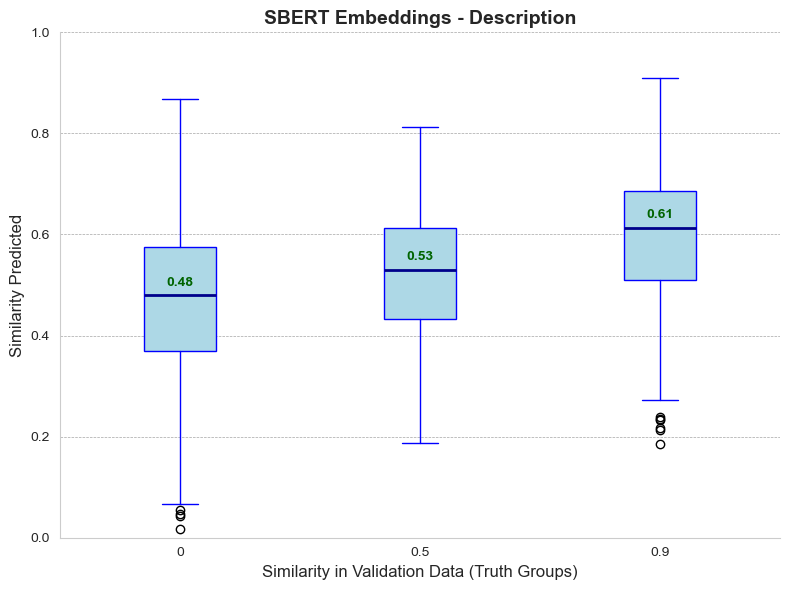

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sim_eval(sim_eval: dict, title:str):
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.set_style("whitegrid")

    box = ax.boxplot(
        sim_eval.values(),
        tick_labels=sim_eval.keys(),
        patch_artist=True,  # Enables custom fill colors
        medianprops=dict(color="darkblue", linewidth=2),  # Median line style
        boxprops=dict(facecolor="lightblue", color="blue"),  # Box style
        whiskerprops=dict(color="blue"),  # Whisker style
        capprops=dict(color="blue")  # Cap style
    )

    ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
    ax.xaxis.grid(False)

    for i, (group, values) in enumerate(sim_eval.items(), start=1):
        median = np.median(values)  # Compute the mean
        ax.text(i, median + 0.025, f"{median:.2f}", ha="center", va="center", fontsize=10, weight="bold", color="darkgreen")

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_ylabel("Similarity Predicted", fontsize=12)
    ax.set_xlabel("Similarity in Validation Data (Truth Groups)", fontsize=12)
    ax.set_title(title, fontsize=14, weight="bold")

    ax.set_ylim(0, 1)

    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_sim_eval(sim_eval_desc, "SBERT Embeddings - Description")

## Do the same for description and tags combined

In [52]:
similarity_matrix_desc_tag = calc_sim_matrix(val_games, 'embeddings_desc_tag', 'cosine')
similarity_matrix_desc

100%|██████████| 72/72 [00:00<00:00, 83.12it/s]


Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.418409,0.653379,0.197249,0.566272,0.681062,0.345921,0.583899,0.551367,0.404240,...,0.264326,0.509785,0.675898,0.501096,0.589751,0.425447,0.698929,0.205307,0.432545,0.531149
among us,0.418409,1.000000,0.455712,0.338565,0.436270,0.577216,0.359393,0.432041,0.426721,0.330514,...,0.237124,0.308412,0.491510,0.460075,0.391767,0.281282,0.480309,0.218853,0.390164,0.476928
the witcher 3: wild hunt,0.653379,0.455712,1.000000,0.184871,0.541590,0.650740,0.519386,0.529123,0.580148,0.366262,...,0.468413,0.519431,0.518789,0.595914,0.622343,0.532920,0.757605,0.289476,0.353006,0.599837
rocket league,0.197249,0.338565,0.184871,1.000000,0.144809,0.268660,0.330287,0.194953,0.202332,0.245379,...,0.042980,0.164824,0.284734,0.350589,0.205352,0.086427,0.250939,0.138376,0.137641,0.137065
stardew valley,0.566272,0.436270,0.541590,0.144809,1.000000,0.590218,0.314502,0.546625,0.435504,0.426490,...,0.234086,0.304671,0.687931,0.376777,0.409058,0.294862,0.646643,0.106598,0.277775,0.688703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.425447,0.281282,0.532920,0.086427,0.294862,0.426594,0.292887,0.451931,0.519537,0.201215,...,0.396960,0.373850,0.294400,0.404589,0.662024,1.000000,0.495398,0.233756,0.242750,0.267077
block story,0.698929,0.480309,0.757605,0.250939,0.646643,0.672377,0.408700,0.580478,0.601102,0.434799,...,0.302649,0.420131,0.685721,0.574944,0.591049,0.495398,1.000000,0.206486,0.357617,0.592680
batman: arkham city,0.205307,0.218853,0.289476,0.138376,0.106598,0.337995,0.430722,0.131220,0.288777,0.284415,...,0.376300,0.259325,0.132764,0.279090,0.187117,0.233756,0.206486,1.000000,0.202187,0.209272


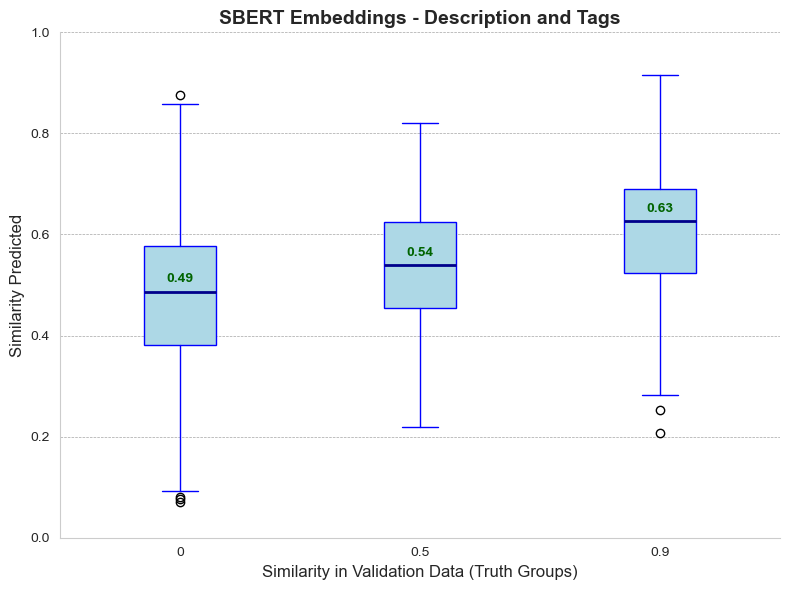

In [53]:
sim_eval_desc_tag = evaluate_similarity(val_data, similarity_matrix_desc_tag)
plot_sim_eval(sim_eval_desc_tag, "SBERT Embeddings - Description and Tags")

In [54]:
delta_desc_tag = delta_matrix(val_data, similarity_matrix_desc_tag)
find_highest_deltas(delta_desc_tag, similarity_matrix_desc_tag, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.4651527047157288' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.3387551546096802' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.22158648967742922' has dtype incompatible with float32, please explic

delta  val_sim  \
Name                     Name                                                 
rise of the tomb raider  tomb raider: legend              0.893547      0.9   
                         tomb raider                      0.875897      0.9   
total war: warhammer iii total war: warhammer ii          0.857351      0.9   
tomb raider: underworld  tomb raider: legend              0.835579      0.9   
total war: warhammer iii total war: warhammer             0.832718      0.9   
...                                                            ...      ...   
fallout 4                dragon age ii: ultimate edition  0.710262      0.0   
minecraft dungeons       fallout 4                        0.709679      0.0   
fallout 4                minecraft dungeons               0.709679      0.0   
tomb raider: underworld  tomb raider iii                  0.709562      0.9   
total war: warhammer     the witcher 3: wild hunt         0.709179      0.0   

                                                          calc_sim  
Name                     Name                                       
rise of the tomb raider  tomb raider: legend              0.893547  
                         tomb raider                      0.875897  
total war: warhammer iii total war: warhammer ii          0.857351  
tomb raider: underworld  tomb raider: legend              0.835579  
total war: warhammer iii total war: warhammer             0.832718  
...                                                            ...  
fallout 4                dragon age ii: ultimate edition  0.710262  
minecraft dungeons       fallout 4                        0.709679  
fallout 4                minecraft dungeons               0.709679  
tomb raider: underworld  tomb raider iii                  0.709562  
total war: warhammer     the witcher 3: wild hunt         0.709179  

[120 rows x 3 columns]

## Weighted approach with tags and description

In [55]:
similarity_matrix_tags = calc_sim_matrix(val_games, 'tags_embd', 'cosine')
similarity_matrix_tags

100%|██████████| 72/72 [00:00<00:00, 78.29it/s]


Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.844967,0.829244,0.689636,0.887188,0.933763,0.860555,0.789470,0.919676,0.766464,...,0.829159,0.844541,0.936399,0.888262,0.845207,0.854407,0.919715,0.624484,0.839699,0.752106
among us,0.844967,1.000000,0.800376,0.722528,0.833318,0.836265,0.834632,0.694975,0.815985,0.752495,...,0.725421,0.729574,0.883454,0.825384,0.816058,0.829573,0.829250,0.524735,0.717890,0.771026
the witcher 3: wild hunt,0.829244,0.800376,1.000000,0.643964,0.771687,0.841053,0.858287,0.676689,0.834599,0.734479,...,0.803788,0.789498,0.812520,0.812878,0.768031,0.827849,0.825849,0.610686,0.754856,0.690457
rocket league,0.689636,0.722528,0.643964,1.000000,0.723544,0.674448,0.697623,0.609457,0.689341,0.690008,...,0.659856,0.660185,0.719084,0.727339,0.682558,0.697366,0.708743,0.515612,0.613765,0.678986
stardew valley,0.887188,0.833318,0.771687,0.723544,1.000000,0.818042,0.806731,0.720369,0.795604,0.794447,...,0.717522,0.715696,0.925543,0.792328,0.769391,0.790542,0.862824,0.464943,0.728792,0.815825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.854407,0.829573,0.827849,0.697366,0.790542,0.831924,0.832592,0.836590,0.851966,0.810773,...,0.769355,0.767428,0.852004,0.843805,0.903069,1.000000,0.859386,0.622578,0.708598,0.729373
block story,0.919715,0.829250,0.825849,0.708743,0.862824,0.856095,0.833685,0.705060,0.842446,0.756799,...,0.750715,0.735800,0.940141,0.817919,0.810896,0.859386,1.000000,0.607486,0.694335,0.730332
batman: arkham city,0.624484,0.524735,0.610686,0.515612,0.464943,0.659682,0.615922,0.462167,0.656849,0.539820,...,0.730298,0.711558,0.577465,0.641291,0.510715,0.622578,0.607486,1.000000,0.534664,0.488279


In [56]:
similarity_matrix_desc_tag_weighted = similarity_matrix_desc * 0.5 + similarity_matrix_tags * 0.5
similarity_matrix_desc_tag_weighted

Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.631688,0.741312,0.443442,0.726730,0.807412,0.603238,0.686685,0.735521,0.585352,...,0.546742,0.677163,0.806149,0.694679,0.717479,0.639927,0.809322,0.414896,0.636122,0.641627
among us,0.631688,1.000000,0.628044,0.530547,0.634794,0.706741,0.597012,0.563508,0.621353,0.541505,...,0.481273,0.518993,0.687482,0.642730,0.603912,0.555427,0.654780,0.371794,0.554027,0.623977
the witcher 3: wild hunt,0.741312,0.628044,1.000000,0.414418,0.656639,0.745896,0.688837,0.602906,0.707373,0.550370,...,0.636101,0.654465,0.665654,0.704396,0.695187,0.680385,0.791727,0.450081,0.553931,0.645147
rocket league,0.443442,0.530547,0.414418,1.000000,0.434176,0.471554,0.513955,0.402205,0.445836,0.467694,...,0.351418,0.412504,0.501909,0.538964,0.443955,0.391897,0.479841,0.326994,0.375703,0.408025
stardew valley,0.726730,0.634794,0.656639,0.434176,1.000000,0.704130,0.560617,0.633497,0.615554,0.610468,...,0.475804,0.510183,0.806737,0.584553,0.589224,0.542702,0.754733,0.285771,0.503284,0.752264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.639927,0.555427,0.680385,0.391897,0.542702,0.629259,0.562739,0.644261,0.685751,0.505994,...,0.583158,0.570639,0.573202,0.624197,0.782547,1.000000,0.677392,0.428167,0.475674,0.498225
block story,0.809322,0.654780,0.791727,0.479841,0.754733,0.764236,0.621193,0.642769,0.721774,0.595799,...,0.526682,0.577965,0.812931,0.696431,0.700973,0.677392,1.000000,0.406986,0.525976,0.661506
batman: arkham city,0.414896,0.371794,0.450081,0.326994,0.285771,0.498838,0.523322,0.296694,0.472813,0.412117,...,0.553299,0.485442,0.355115,0.460191,0.348916,0.428167,0.406986,1.000000,0.368425,0.348776


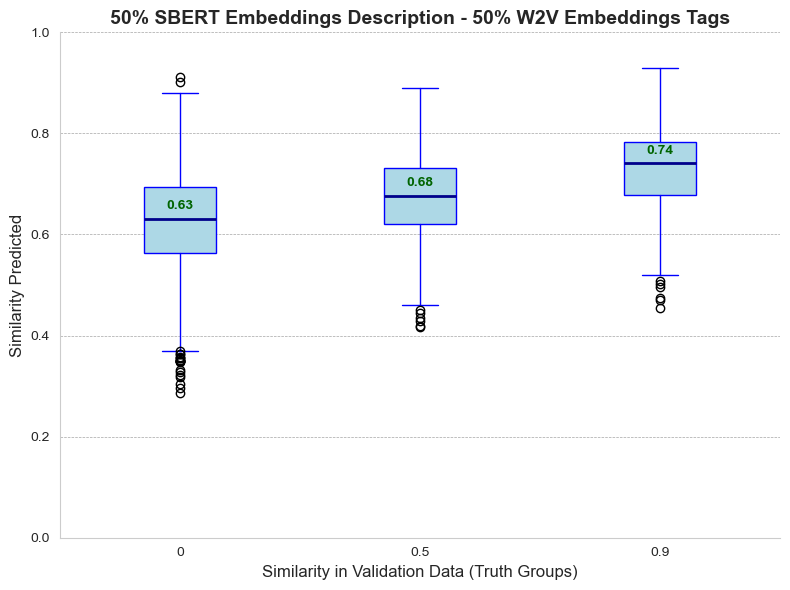

In [57]:
sim_eval_desc_tag_weighted = evaluate_similarity(val_data, similarity_matrix_desc_tag_weighted)
plot_sim_eval(sim_eval_desc_tag_weighted, "50% SBERT Embeddings Description - 50% W2V Embeddings Tags")

In [58]:
delta_desc_tag_weighted = delta_matrix(val_data, similarity_matrix_desc_tag_weighted)
find_highest_deltas(delta_desc_tag_weighted, similarity_matrix_desc_tag_weighted, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.2785897493362427' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.18573679924011233' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.08829143047332766' has dtype incompatible with float32, please expli

,,delta,val_sim,calc_sim
Name,Name,,,
rise of the tomb raider,tomb raider,0.911049,0.9,0.911049
total war: warhammer iii,total war: warhammer ii,0.901357,0.9,0.901357
rise of the tomb raider,tomb raider: legend,0.894062,0.9,0.894062
tomb raider: underworld,tomb raider: legend,0.889885,0.9,0.889885
star wars knights of the old republic ii - the sith lords,star wars - knights of the old republic,0.879947,0.9,0.879947
...,...,...,...,...
block story,neverwinter nights: enhanced edition,0.784837,0.0,0.784837
uncharted: legacy of thieves collection,neverwinter nights: enhanced edition,0.784189,0.5,0.784189
just cause 3,fallout: new vegas,0.783523,0.5,0.783523


## Weighted approach with genres and description

In [59]:
similarity_matrix_genres = calc_sim_matrix(val_games, 'genre_embd', 'cosine')
similarity_matrix_genres

100%|██████████| 72/72 [00:00<00:00, 78.01it/s]


Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.362158,0.697221,0.654264,0.812080,0.697221,0.768595,0.308458,0.768595,0.410223,...,0.580209,0.768595,0.868990,0.633695,0.546341,0.562931,1.000000,0.768595,0.839590,0.661313
among us,0.362158,1.000000,0.252323,0.294304,0.360595,0.252323,0.207683,0.122148,0.207683,0.181399,...,0.130162,0.207683,0.658899,0.195476,0.156140,0.195269,0.362158,0.207683,0.351519,0.638687
the witcher 3: wild hunt,0.697221,0.252323,1.000000,0.228702,0.748591,1.000000,0.248131,0.198781,0.248131,0.264444,...,0.150064,0.248131,0.369670,0.238509,0.216765,0.267819,0.697221,0.248131,0.350972,0.385759
rocket league,0.654264,0.294304,0.228702,1.000000,0.506750,0.228702,0.579392,0.245248,0.579392,0.329575,...,0.587934,0.579392,0.695789,0.340566,0.510928,0.503958,0.654264,0.579392,0.596450,0.551430
stardew valley,0.812080,0.360595,0.748591,0.506750,1.000000,0.748591,0.382909,0.291874,0.382909,0.604468,...,0.280401,0.382909,0.648212,0.323586,0.354586,0.585602,0.812080,0.382909,0.658061,0.797958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.562931,0.195269,0.267819,0.503958,0.585602,0.267819,0.638681,0.731072,0.638681,0.916992,...,0.688351,0.638681,0.543062,0.338750,0.879698,1.000000,0.562931,0.638681,0.351973,0.746165
block story,1.000000,0.362158,0.697221,0.654264,0.812080,0.697221,0.768595,0.308458,0.768595,0.410223,...,0.580209,0.768595,0.868990,0.633695,0.546341,0.562931,1.000000,0.768595,0.839590,0.661313
batman: arkham city,0.768595,0.207683,0.248131,0.579392,0.382909,0.248131,1.000000,0.319275,1.000000,0.404979,...,0.768199,1.000000,0.772138,0.812368,0.666842,0.638681,0.768595,1.000000,0.670187,0.427001


In [60]:
similarity_matrix_desc_genres_weighted = similarity_matrix_desc * 0.5 + similarity_matrix_genres * 0.5
similarity_matrix_desc_genres_weighted

Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.390284,0.675300,0.425757,0.689176,0.689141,0.557258,0.446179,0.659981,0.407232,...,0.422268,0.639190,0.772444,0.567396,0.568046,0.494189,0.849464,0.486951,0.636068,0.596231
among us,0.390284,1.000000,0.354018,0.316435,0.398432,0.414770,0.283538,0.277095,0.317202,0.255956,...,0.183643,0.258048,0.575205,0.327776,0.273953,0.238276,0.421234,0.213268,0.370842,0.557808
the witcher 3: wild hunt,0.675300,0.354018,1.000000,0.206786,0.645091,0.825370,0.383758,0.363952,0.414139,0.315353,...,0.309239,0.383781,0.444229,0.417211,0.419554,0.400369,0.727413,0.268803,0.351989,0.492798
rocket league,0.425757,0.316435,0.206786,1.000000,0.325779,0.248681,0.454839,0.220101,0.390862,0.287477,...,0.315457,0.372108,0.490261,0.345577,0.358140,0.295193,0.452602,0.358884,0.367046,0.344248
stardew valley,0.689176,0.398432,0.645091,0.325779,1.000000,0.669405,0.348705,0.419250,0.409206,0.515479,...,0.257243,0.343790,0.668072,0.350182,0.381822,0.440232,0.729361,0.244753,0.467918,0.743331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.494189,0.238276,0.400369,0.295193,0.440232,0.347206,0.465784,0.591502,0.579109,0.559103,...,0.542656,0.506266,0.418731,0.371669,0.770861,1.000000,0.529164,0.436218,0.297362,0.506621
block story,0.849464,0.421234,0.727413,0.452602,0.729361,0.684799,0.588647,0.444468,0.684848,0.422511,...,0.441429,0.594363,0.777355,0.604320,0.568695,0.529164,1.000000,0.487540,0.598604,0.626997
batman: arkham city,0.486951,0.213268,0.268803,0.358884,0.244753,0.293063,0.715361,0.225247,0.644388,0.344697,...,0.572249,0.629663,0.452451,0.545729,0.426980,0.436218,0.487540,1.000000,0.436187,0.318137


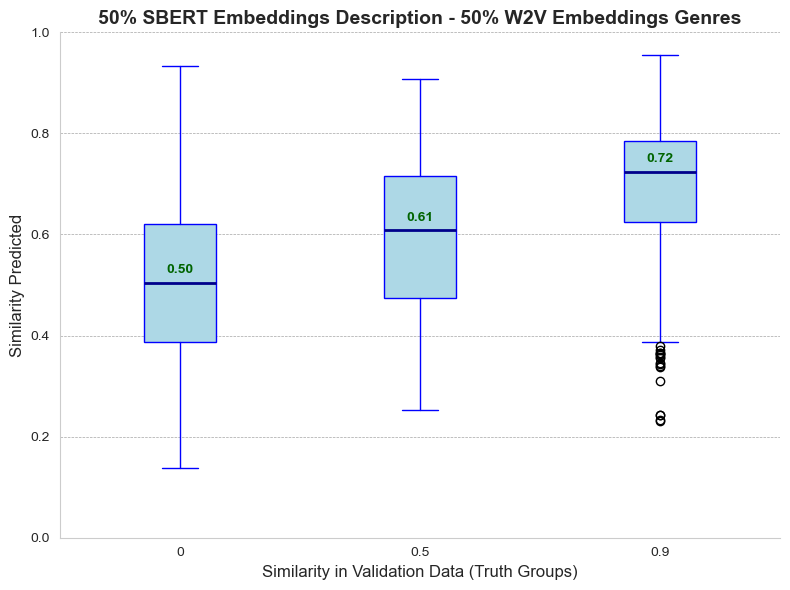

In [61]:
sim_eval_desc_genres_weighted = evaluate_similarity(val_data, similarity_matrix_desc_genres_weighted)
plot_sim_eval(sim_eval_desc_genres_weighted, "50% SBERT Embeddings Description - 50% W2V Embeddings Genres")

In [62]:
delta_desc_genres_weighted = delta_matrix(val_data, similarity_matrix_desc_genres_weighted)
find_highest_deltas(delta_desc_genres_weighted, similarity_matrix_desc_genres_weighted, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.3459156394004822' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.3305689930915833' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.08075346946716311' has dtype incompatible with float32, please explic

delta  \
Name                     Name                                                     
rise of the tomb raider  tomb raider: legend                           0.942019   
                         tomb raider                                   0.934163   
total war: warhammer iii total war: warhammer ii                       0.925164   
tomb raider: underworld  tomb raider: legend                           0.911223   
total war: warhammer iii total war: warhammer                          0.902549   
...                                                                         ...   
block story              the witcher: enhanced edition director's cut  0.771983   
tomb raider: underworld  batman: arkham origins                        0.771183   
batman: arkham origins   tomb raider: underworld                       0.771183   
elex                     block story                                   0.770535   
block story              elex                                          0.770535   

                                                                       val_sim  \
Name                     Name                                                    
rise of the tomb raider  tomb raider: legend                               0.9   
                         tomb raider                                       0.9   
total war: warhammer iii total war: warhammer ii                           0.9   
tomb raider: underworld  tomb raider: legend                               0.9   
total war: warhammer iii total war: warhammer                              0.9   
...                                                                        ...   
block story              the witcher: enhanced edition director's cut      0.0   
tomb raider: underworld  batman: arkham origins                            0.0   
batman: arkham origins   tomb raider: underworld                           0.0   
elex                     block story                                       0.0   
block story              elex                                              0.0   

                                                                       calc_sim  
Name                     Name                                                    
rise of the tomb raider  tomb raider: legend                           0.942019  
                         tomb raider                                   0.934163  
total war: warhammer iii total war: warhammer ii                       0.925164  
tomb raider: underworld  tomb raider: legend                           0.911223  
total war: warhammer iii total war: warhammer                          0.902549  
...                                                                         ...  
block story              the witcher: enhanced edition director's cut  0.771983  
tomb raider: underworld  batman: arkham origins                        0.771183  
batman: arkham origins   tomb raider: underworld                       0.771183  
elex                     block story                                   0.770535  
block story              elex                                          0.770535  

[120 rows x 3 columns]

## Calculate and evaluate similarities with word embeddings

In [63]:
similarity_matrix_desc_tokens = calc_sim_matrix(val_games, 'embeddings_desc_tokens', "cosine")
similarity_matrix_desc_tokens

100%|██████████| 72/72 [00:00<00:00, 72.85it/s]


Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.860573,0.930318,0.863874,0.930965,0.924736,0.910431,0.918162,0.926545,0.893149,...,0.824644,0.867063,0.897048,0.886099,0.935590,0.853729,0.898746,0.804994,0.907339,0.890988
among us,0.860573,1.000000,0.878740,0.915330,0.890756,0.907630,0.890492,0.883825,0.868251,0.902539,...,0.751809,0.815377,0.912134,0.894516,0.843949,0.775505,0.893138,0.740232,0.863239,0.898619
the witcher 3: wild hunt,0.930318,0.878740,1.000000,0.873613,0.917420,0.929964,0.924674,0.902478,0.933967,0.907216,...,0.854978,0.878479,0.899239,0.901306,0.942994,0.877663,0.930004,0.807655,0.904640,0.910693
rocket league,0.863874,0.915330,0.873613,1.000000,0.886383,0.902214,0.905143,0.862183,0.856253,0.897192,...,0.715770,0.806563,0.901953,0.927039,0.847385,0.769058,0.889158,0.724638,0.849643,0.875211
stardew valley,0.930965,0.890756,0.917420,0.886383,1.000000,0.927695,0.905977,0.928634,0.912593,0.899508,...,0.786207,0.839693,0.924418,0.884603,0.900342,0.809475,0.915564,0.774158,0.877553,0.905426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.853729,0.775505,0.877663,0.769058,0.809475,0.829420,0.814873,0.805247,0.822037,0.803312,...,0.809016,0.823197,0.789114,0.786796,0.909481,1.000000,0.805744,0.802709,0.854002,0.809689
block story,0.898746,0.893138,0.930004,0.889158,0.915564,0.910320,0.883702,0.891140,0.897187,0.901276,...,0.747586,0.816910,0.920677,0.902825,0.893417,0.805744,1.000000,0.739781,0.844915,0.908499
batman: arkham city,0.804994,0.740232,0.807655,0.724638,0.774158,0.797155,0.805334,0.751307,0.807857,0.764954,...,0.851456,0.788628,0.731370,0.726664,0.804864,0.802709,0.739781,1.000000,0.785665,0.765591


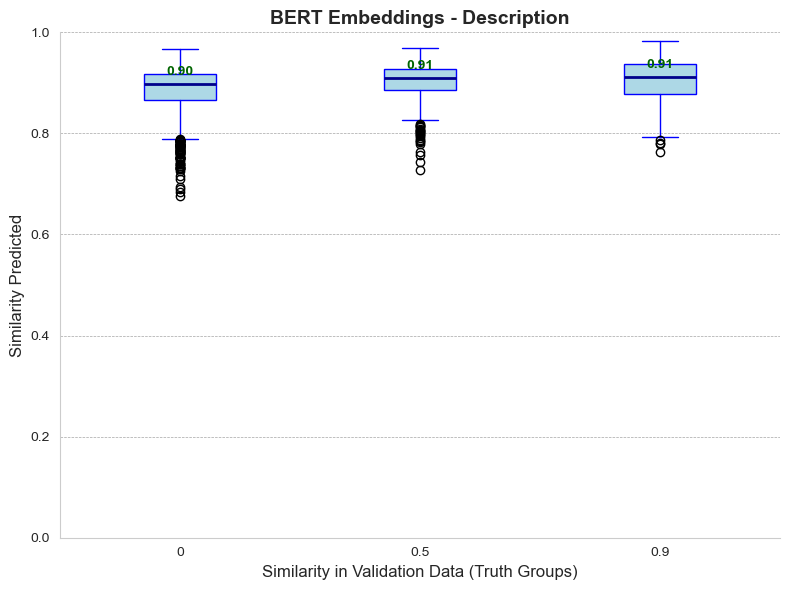

In [64]:
sim_eval_desc_tokens = evaluate_similarity(val_data, similarity_matrix_desc_tokens)
plot_sim_eval(sim_eval_desc_tokens, "BERT Embeddings - Description")

In [65]:
similarity_matrix_name = calc_sim_matrix(val_games, 'name_embd', 'cosine')
similarity_matrix_name

100%|██████████| 72/72 [00:00<00:00, 75.67it/s]


Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
among us,0.0,1.000000,0.200901,0.128475,0.177669,0.050168,0.185241,0.174578,0.055013,0.072867,...,0.148356,0.098929,0.046371,0.161190,0.173226,0.202949,0.094662,0.153238,0.133295,0.290937
the witcher 3: wild hunt,0.0,0.200901,1.000000,0.206653,0.191465,0.125998,0.361280,0.136061,0.129562,0.088203,...,0.280472,0.134217,0.111443,0.189891,0.200519,0.210719,0.152934,0.110705,0.237220,0.385392
rocket league,0.0,0.128475,0.206653,1.000000,0.146365,0.148595,0.185197,0.138277,0.158255,0.062677,...,0.189746,0.158378,0.199999,0.077242,0.106465,0.151185,0.154382,0.178207,0.081449,0.208672
stardew valley,0.0,0.177669,0.191465,0.146365,1.000000,0.038936,0.076747,0.195602,0.197914,0.175514,...,0.277109,0.175784,0.219135,0.055514,0.105054,0.133238,0.093291,0.327459,0.080506,0.181811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.0,0.202949,0.210719,0.151185,0.133238,0.187365,0.332009,0.334261,0.214701,0.089988,...,0.279172,0.254099,0.242007,0.137957,0.419374,1.000000,0.133515,0.148780,0.063801,0.230376
block story,0.0,0.094662,0.152934,0.154382,0.093291,0.155282,0.215661,0.140024,0.167007,0.078238,...,0.211564,0.124564,0.161045,0.159138,0.124730,0.133515,1.000000,0.118317,0.112032,0.224713
batman: arkham city,0.0,0.153238,0.110705,0.178207,0.327459,0.068086,0.101969,0.106320,0.097948,0.321483,...,0.139844,0.089085,0.161937,0.173985,0.057380,0.148780,0.118317,1.000000,0.053650,0.198113


### Mix name with desc, tag

In [66]:
similarity_matrix_desc_genres_name_weighted = similarity_matrix_desc * 0.6 + similarity_matrix_genres * 0.2 + similarity_matrix_name * 0.2
similarity_matrix_desc_genres_name_weighted

Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,0.800000,0.323477,0.531472,0.249202,0.502179,0.548081,0.361272,0.412031,0.484539,0.324589,...,0.274637,0.459590,0.579337,0.427397,0.463119,0.367855,0.619357,0.276903,0.427445,0.450952
among us,0.323477,1.000000,0.364072,0.287695,0.369415,0.406828,0.294221,0.318570,0.308572,0.249161,...,0.197978,0.246370,0.435960,0.347378,0.300933,0.248413,0.379550,0.203496,0.331061,0.472082
the witcher 3: wild hunt,0.531472,0.364072,1.000000,0.197993,0.512966,0.615643,0.433514,0.384442,0.423627,0.290286,...,0.367155,0.388128,0.407496,0.443228,0.456863,0.415459,0.624594,0.245452,0.329442,0.514133
rocket league,0.249202,0.287695,0.197993,1.000000,0.217508,0.236656,0.351090,0.193677,0.268929,0.225678,...,0.181324,0.246449,0.349998,0.293915,0.246690,0.182885,0.312293,0.234545,0.218164,0.234259
stardew valley,0.502179,0.369415,0.512966,0.217508,1.000000,0.511636,0.280633,0.425470,0.377467,0.411890,...,0.251953,0.294541,0.586228,0.301886,0.337363,0.320685,0.569060,0.206032,0.314378,0.609176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.367855,0.248413,0.415459,0.182885,0.320685,0.346993,0.369870,0.484226,0.482398,0.322125,...,0.431681,0.402866,0.333654,0.338095,0.657029,1.000000,0.436528,0.297746,0.228805,0.355554
block story,0.619357,0.379550,0.624594,0.312293,0.569060,0.573927,0.442071,0.437983,0.547781,0.358572,...,0.339944,0.430711,0.617440,0.503533,0.488844,0.436528,1.000000,0.301274,0.404895,0.532813
batman: arkham city,0.276903,0.203496,0.245452,0.234545,0.206032,0.266040,0.478827,0.163851,0.392855,0.315941,...,0.407388,0.373412,0.266474,0.364725,0.257115,0.297746,0.301274,1.000000,0.266080,0.250586


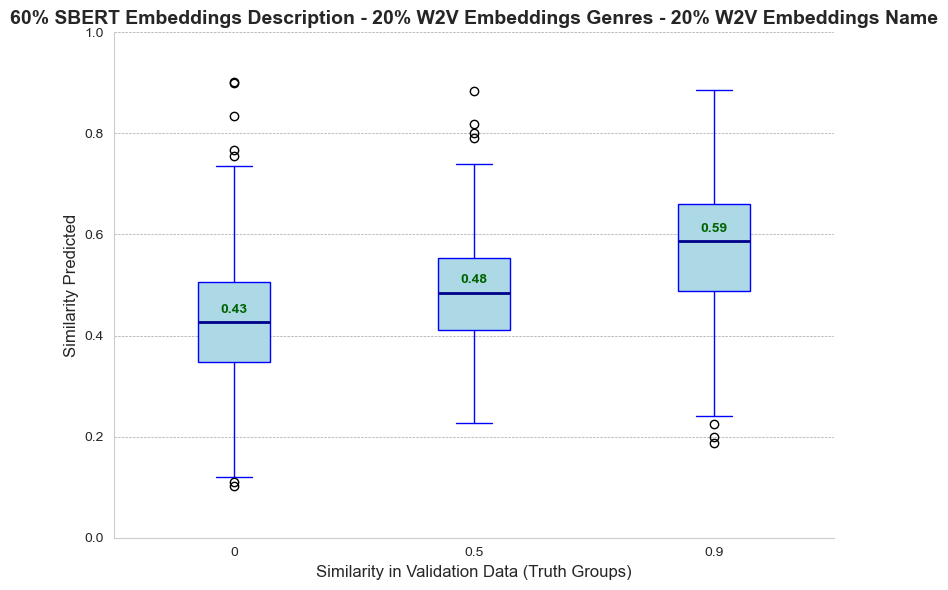

In [67]:
sim_eval_desc_genres_name_weighted = evaluate_similarity(val_data, similarity_matrix_desc_genres_name_weighted)
plot_sim_eval(sim_eval_desc_genres_name_weighted, "60% SBERT Embeddings Description - 20% W2V Embeddings Genres - 20% W2V Embeddings Name")

In [68]:
delta_desc_genres_name_weighted = delta_matrix(val_data, similarity_matrix_desc_genres_name_weighted)
find_highest_deltas(delta_desc_genres_name_weighted, similarity_matrix_desc_genres_name_weighted, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.495066249370575' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.43521916270256045' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = calc_sim - val_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_8712/877176553.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.29398884773254397' has dtype incompatible with float32, please explic

delta  \
Name                            Name                                        
total war: warhammer iii        total war: warhammer ii          0.901105   
rise of the tomb raider         tomb raider                      0.900668   
                                tomb raider: legend              0.855407   
total war: warhammer iii        total war: warhammer             0.843371   
tomb raider: underworld         tomb raider: legend              0.841271   
...                                                                   ...   
total war: warhammer            dragon age ii: ultimate edition  0.619785   
dragon age ii: ultimate edition total war: warhammer             0.619785   
the witcher 3: wild hunt        dragon quest builders 2          0.619564   
terraria                        block story                      0.619357   
dragon age inquisition          total war: pharaoh               0.618974   

                                                                 val_sim  \
Name                            Name                                       
total war: warhammer iii        total war: warhammer ii              0.9   
rise of the tomb raider         tomb raider                          0.9   
                                tomb raider: legend                  0.9   
total war: warhammer iii        total war: warhammer                 0.9   
tomb raider: underworld         tomb raider: legend                  0.9   
...                                                                  ...   
total war: warhammer            dragon age ii: ultimate edition      0.0   
dragon age ii: ultimate edition total war: warhammer                 0.0   
the witcher 3: wild hunt        dragon quest builders 2              0.9   
terraria                        block story                          0.9   
dragon age inquisition          total war: pharaoh                   0.0   

                                                                 calc_sim  
Name                            Name                                       
total war: warhammer iii        total war: warhammer ii          0.901105  
rise of the tomb raider         tomb raider                      0.900668  
                                tomb raider: legend              0.855407  
total war: warhammer iii        total war: warhammer             0.843371  
tomb raider: underworld         tomb raider: legend              0.841271  
...                                                                   ...  
total war: warhammer            dragon age ii: ultimate edition  0.619785  
dragon age ii: ultimate edition total war: warhammer             0.619785  
the witcher 3: wild hunt        dragon quest builders 2          0.619564  
terraria                        block story                      0.619357  
dragon age inquisition          total war: pharaoh               0.618974  

[120 rows x 3 columns]

In [73]:
similarity_matrix_tagdesc_name_weighted = similarity_matrix_desc_tag * 0.8 + similarity_matrix_name * 0.2
similarity_matrix_tagdesc_name_weighted

Name,terraria,among us,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,red dead redemption 2,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,0.800000,0.325987,0.503794,0.178955,0.425284,0.514639,0.285946,0.431008,0.439394,0.311402,...,0.241664,0.407631,0.527670,0.372395,0.447142,0.322745,0.521398,0.208138,0.317716,0.419461
among us,0.325987,1.000000,0.406637,0.293698,0.381485,0.476223,0.314551,0.397476,0.367514,0.271972,...,0.238498,0.289600,0.399970,0.398957,0.352384,0.288781,0.392580,0.208717,0.332469,0.444379
the witcher 3: wild hunt,0.503794,0.406637,1.000000,0.188869,0.471755,0.548291,0.501984,0.452166,0.499141,0.312541,...,0.452746,0.463989,0.441895,0.503492,0.540050,0.448658,0.619543,0.279212,0.314179,0.563627
rocket league,0.178955,0.293698,0.188869,1.000000,0.148825,0.243401,0.315642,0.199409,0.201362,0.208876,...,0.118867,0.202138,0.265791,0.295354,0.189804,0.115030,0.238483,0.186699,0.148444,0.172477
stardew valley,0.425284,0.381485,0.471755,0.148825,1.000000,0.476192,0.263156,0.476967,0.394886,0.374992,...,0.235549,0.296429,0.593293,0.301829,0.347681,0.248851,0.517679,0.156496,0.236182,0.590324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a total war saga: troy,0.322745,0.288781,0.448658,0.115030,0.248851,0.391727,0.291004,0.432409,0.461513,0.194975,...,0.382551,0.357547,0.297205,0.361209,0.620535,1.000000,0.397517,0.213499,0.181734,0.276599
block story,0.521398,0.392580,0.619543,0.238483,0.517679,0.554634,0.377093,0.472088,0.516274,0.355816,...,0.311053,0.390945,0.576708,0.474562,0.481777,0.397517,1.000000,0.232807,0.317273,0.529706
batman: arkham city,0.208138,0.208717,0.279212,0.186699,0.156496,0.304593,0.381815,0.154142,0.298704,0.331279,...,0.365400,0.278047,0.181765,0.320110,0.184614,0.213499,0.232807,1.000000,0.207059,0.236803


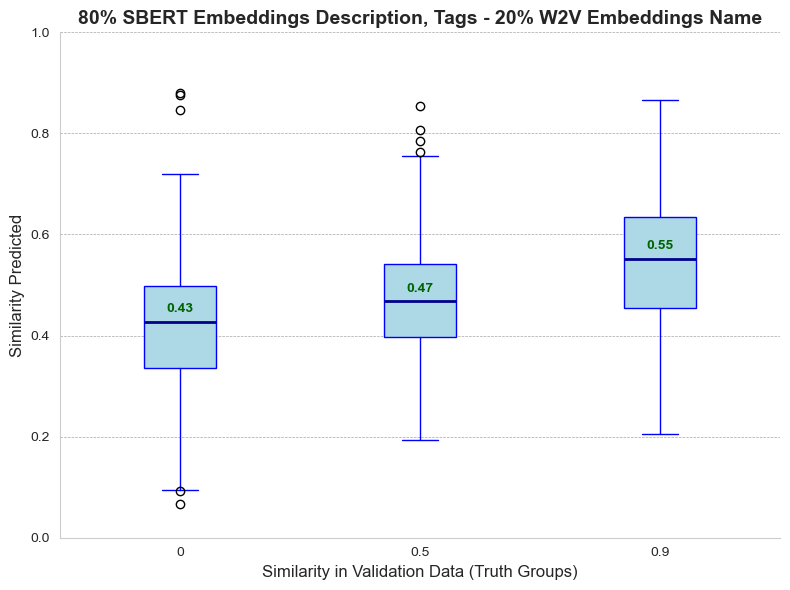

In [74]:
sim_eval_tagdesc_name_weighted = evaluate_similarity(val_data, similarity_matrix_tagdesc_name_weighted)
plot_sim_eval(sim_eval_tagdesc_name_weighted, "80% SBERT Embeddings Description, Tags - 20% W2V Embeddings Name")